# 14 Convolutional Neural Network

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import numpy as np

In [42]:
nepochs = 6
batch_size = 4 
lr = 0.001

In [34]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [35]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,
                                             transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True,
                                             transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [36]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)

In [37]:
classes = {'plane', 'car', 'bird', 'cat', 'deer', 'dog',
           'frog', 'horse', 'ship', 'truck'}

In [38]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5) # (W - F + 2P)/S + 1
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) 
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [49]:
model = ConvNet()

In [50]:
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [51]:
n_total_steps = len(train_loader)

best = 9999
n_best = 0
stop = False

for epoch in range(nepochs):
    if stop: break
    for i, (image, label) in enumerate(train_loader):
        pred = model(image)
        loss = criteria(pred, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % 1000 == 999:
            print(f'epoch {epoch+1}, iter {i+1:5d}, loss {loss.item():.7f}')
            
        if i % 200 == 199:
            with torch.no_grad():
                tloss = 0
                for image, label in test_loader:
                    pred = model(image)
                    tloss += criteria(pred, label).item()
                if tloss < best:
                    best = tloss
                    n_best = 0
                else:
                    n_best += 1
            
            if n_best == 10:
                stop = True
                break

epoch 1, iter  1000, loss 2.3066492
epoch 1, iter  2000, loss 1.6214784
epoch 1, iter  3000, loss 1.2274020
epoch 1, iter  4000, loss 1.7508314
epoch 1, iter  5000, loss 1.9353585
epoch 1, iter  6000, loss 1.0940089
epoch 1, iter  7000, loss 0.5113098
epoch 1, iter  8000, loss 1.8062088
epoch 1, iter  9000, loss 1.3372762
epoch 1, iter 10000, loss 1.2330068
epoch 1, iter 11000, loss 1.4127485
epoch 1, iter 12000, loss 1.0421176


In [52]:
with torch.no_grad():
    correct = 0
    samples = 0
    class_correct = [0 for _ in range(10)]
    class_samples = [0 for _ in range(10)]
    
    for images, labels in test_loader:
        pred = model(images)
        _, predicted = torch.max(pred, 1)
        samples += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if label == pred :
                class_correct[label] += 1
            class_samples[label] += 1

In [53]:
print(f'Accuracy: {100 * correct/samples:.3f}')

Accuracy: 51.440


In [54]:
accuracies = np.array(class_correct) / np.array(class_samples)
accuracies

array([0.707, 0.645, 0.351, 0.201, 0.473, 0.495, 0.574, 0.699, 0.517,
       0.482])

In [55]:
import seaborn as sns

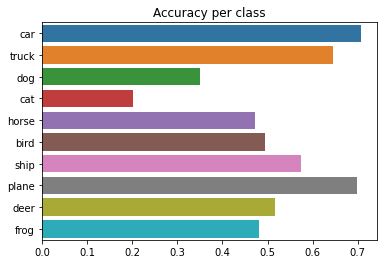

In [56]:
cc = [x for x in classes]
sns.barplot(x = accuracies, y = cc)
plt.title('Accuracy per class')
plt.show()